# Principal component analysis (PCA) with hoggorm

This notebook illustrates how to use the **hoggorm** package to carry out principal component analysis (PCA) on a multivariate data set. Furthermore, we will learn how to visualise the results of the PCA using the **hoggormPlot** package.

---

### Load and prepare data

First import **hoggorm** for analysis of the data and **hoggormPlot** for plotting of the analysis results. We'll also import **pandas** such that we can read the data into a data frame. **numpy** is needed for checking dimensions of the data.

In [1]:
import hoggorm as ho
import hoggormplot.resPlotting as hop
import pandas as pd
import numpy as np

Next, load some multivariate data that we are going to analyse using **hoggorm**. The data can be acquired from the OECD and holds the percentages of various cacner types in men. After the data has been loaded into the pandas data frame, we'll display it in the notebook.

In [2]:
# Load OECD data for cancer in men
oecd_df = pd.read_table('Cancer_men_perc.txt', index_col=0)
oecd_df

,Trachea-bronchus-lung,"Colon, rectum and anus",Stomach,Pancreas,Prostate,Liver,Hodgkins disease,Leukemia,Bladder,Skin
MEN,,,,,,,,,,
Australia,20.493429,9.290024,2.954790,5.033474,13.612695,4.049921,0.157038,3.855691,3.107695,4.425986
Austria,22.286929,10.944722,4.584951,6.627842,10.574968,5.666482,0.147902,3.780736,3.031984,1.941209
Belgium,30.090706,10.450900,3.253582,5.179440,9.162613,3.450769,0.144604,3.569081,4.719337,1.018798
Canada,27.731624,11.443416,3.011842,5.419733,9.739695,3.863702,0.195163,3.789857,3.534035,1.537569
Chile,13.304823,8.022491,17.272511,4.165677,16.195454,5.044745,0.221747,3.009424,2.162034,0.554368
Czech Rep.,24.875324,13.970344,4.455083,6.742470,9.455416,3.464326,0.279274,3.371235,3.557417,1.522708
Denmark,24.311585,12.168196,3.212602,6.375589,14.301662,3.162987,0.210866,3.100968,4.366162,2.245100
Estonia,26.371951,10.264228,8.333333,5.436992,13.008130,2.388211,0.101626,3.861789,3.506098,1.016260
Finland,23.917887,9.818587,4.169319,7.940802,13.574157,4.232973,0.159134,2.737110,2.928071,2.418842


Let's have a look at the dimensions of the data frame.

In [3]:
np.shape(oecd_df)

(35, 10)

There are data for 34 countries as well as all of OECD, which results in 35 rows. Furthermore, there are 10 columns where each column represents one type of cancer in men.

The *nipalsPCA* class in hoggorm accepts only **numpy** arrays with numerical values and not pandas data frames. Therefore, the pandas data frame holding the imported data needs to be "taken apart" into three parts: 
* a numpy array holding the numeric values
* a Python list holding variable (column) names
* a Python list holding object (row) names. 

The array with values will be used as input for the *nipalsPCA* class for analysis. The Python lists holding the variable and row names will be used later in the plotting function from the **hoggormPlot** package when visualising the results of the analysis. Below is the code needed to take the data frame apart.

In [4]:
# Get the values from the data frame
oecd = oecd_df.values

# Get the variable or columns names
oecd_varNames = list(oecd_df.columns)

# Get the object or row names
oecd_objNames = list(oecd_df.index)

Let's have a quick look at the column or variable names.

In [5]:
oecd_varNames

['Trachea-bronchus-lung',
 'Colon, rectum and anus',
 'Stomach',
 'Pancreas',
 'Prostate',
 'Liver',
 'Hodgkins disease',
 'Leukemia',
 'Bladder',
 'Skin']

Now show the object or row names.

In [6]:
oecd_objNames

['Australia',
 'Austria',
 'Belgium',
 'Canada',
 'Chile',
 'Czech Rep.',
 'Denmark',
 'Estonia',
 'Finland',
 'France',
 'Germany',
 'Greece',
 'Hungary',
 'Iceland',
 'Ireland',
 'Israel',
 'Italy',
 'Japan',
 'Korea',
 'Luxembourg',
 'Mexico',
 'Netherlands',
 'New Zealand',
 'Norway',
 'Poland',
 'Portugal',
 'Slovak Rep.',
 'Slovenia',
 'Spain',
 'Sweden',
 'Switzerland',
 'Turkey',
 'United Kingdom',
 'United States',
 'OECD']

---

### Apply PCA to our data

Now, let's run PCA on the data using the *nipalsPCA* class. Using input paramter *arrX* we define which numpy array we would like to analyse. By setting input parameter *Xstand=False* we make sure that the variables are not scaled to unit variance. This is the default setting and actually doesn't need to expressed explicitly. Setting paramter *cvType=["loo"]* we make sure that we compute the PCA model using full cross validation. *"loo"* means "Leave One Out". By setting paramter *numpComp=4* we ask the four principal components (PC) to be computed.

In [7]:
model_01 = ho.nipalsPCA(arrX=oecd, Xstand=False, cvType=["loo"], numComp=4)

loo


That's it, the PCA model has been computed. Now we would like to inspect the results by visualising them. We can do this using the taylor-made plotting function for PCA from the separate **hoggormPlot** package. If we wish to plot the results for component 1 and component 2, we can do this by setting the input argument *pc=[1, 2]*. The input argument *plots=[1, 2, 3, 4]* lets the user define which plots are to be plotted. If this list for example contains value *1*, the function will generate the scores plot for the model. If the list contains value 2, then the loadings plot will be plotted. Value 3 stands for correlation loadings plot and value 4 stand for explaind variance plot.

1


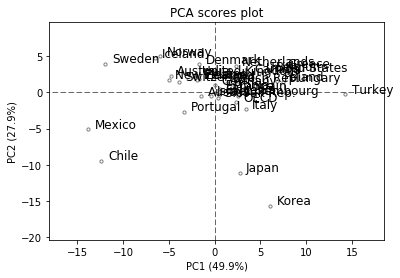

2


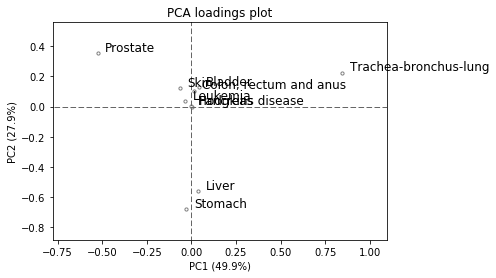

3


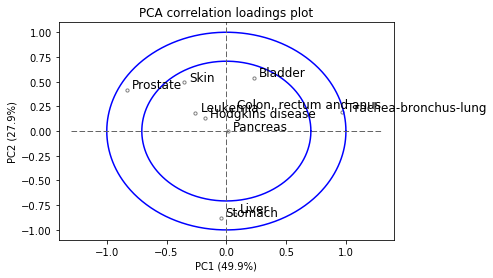

4


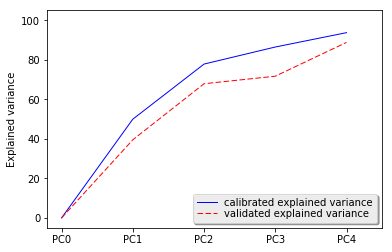

In [8]:
hop.plotPCA(model_01, pc=[1, 2], plots=[1, 2, 3, 4], 
            objNames=oecd_objNames, 
            varNames=oecd_varNames)

---

### Accessing numerical results

Before we access numerical results from the PCA, let's have a look which methods are available.

In [9]:
help(ho.nipalsPCA)

Help on class nipalsPCA in module hoggorm.pca:

class nipalsPCA(builtins.object)
 |  This class carries out Principal Component Analysis using the
 |  NIPALS algorithm.
 |  
 |  
 |  PARAMETERS
 |  ----------
 |  arrX : numpy array
 |      A numpy array containg the data 
 |  numComp : int, optional
 |      An integer that defines how many components are to be computed
 |  Xstand : boolean, optional 
 |      False : columns of arrX are mean centred (default)
 |      True : columns of arrX are mean centred and devided by their own 
 |          standard deviation
 |  cvType : list
 |      The list defines cross validation settings when computing the
 |      PCA model. Choose cross validation type from the following:
 |      
 |      loo : leave one out / a.k.a. full cross validation (default)
 |      cvType = ["loo"]
 |      
 |      KFold : leave out one fold or segment
 |      cvType = ["KFold", numFolds]
 |          numFolds: int 
 |          number of folds or segments 
 |  
 |      

Now that we have visualised the PCA results, we may want to access the numerical results.

In [10]:
# Get the scores
model_01.X_scores()

array([[ -4.80427678e+00,   2.31026292e+00,  -3.20919441e-01,
          2.83588493e+00],
       [ -1.49101340e+00,  -5.21756056e-01,  -1.66910340e+00,
          1.55857749e+00],
       [  5.93045947e+00,   2.93009762e+00,   7.58349229e-01,
          1.19912489e+00],
       [  3.58065788e+00,   2.56020599e+00,  -5.93118157e-01,
          1.02747146e+00],
       [ -1.23821509e+01,  -9.44183584e+00,   6.72770500e+00,
         -3.07035611e+00],
       [  1.31977343e+00,   1.31551500e+00,  -2.35029918e+00,
         -1.66861113e+00],
       [ -1.71177213e+00,   3.91420893e+00,   7.67223251e-02,
          2.51714334e-01],
       [  5.24114730e-01,   4.35026626e-01,   4.30867677e+00,
         -1.26284394e+00],
       [ -1.74121029e+00,   1.88616974e+00,   8.30626232e-01,
          2.08534936e+00],
       [  1.43529718e+00,   2.32769848e-01,  -1.27538454e+00,
          2.79220995e+00],
       [  5.70559866e-02,   9.64567418e-01,  -3.88892733e-01,
          6.58497656e-01],
       [  7.22650139e

In [11]:
help(ho.nipalsPCA.X_scores)

Help on function X_scores in module hoggorm.pca:

X_scores(self)
    Returns array holding scores T. First column holds scores for 
    component 1, second column holds scores for component 2, etc.



In [12]:
# Dimension of the scores
np.shape(model_01.X_scores())

(35, 4)

We see that the numpy array holds the scores for all countries and OECD (35 in total) for four components as required when computing the PCA model.

In [13]:
# Get the loadings
model_01.X_loadings()

array([[  8.45198737e-01,   2.24592716e-01,   3.14566109e-01,
          4.63885066e-02],
       [  1.56597464e-02,   1.06296269e-01,  -5.50679115e-01,
         -6.68952998e-01],
       [ -2.79414066e-02,  -6.80375913e-01,   4.98525658e-01,
         -4.71499433e-01],
       [  1.79916561e-03,  -6.25950704e-04,  -1.41296825e-01,
          8.42078730e-02],
       [ -5.25512612e-01,   3.54901591e-01,   4.53069739e-01,
          8.63093768e-02],
       [  3.58955611e-02,  -5.62988428e-01,  -3.27116872e-01,
          5.18503886e-01],
       [ -5.20810301e-03,   5.02005702e-03,   1.50708898e-02,
          3.08297776e-03],
       [ -3.60678488e-02,   3.49014971e-02,   1.00280298e-02,
          1.65016000e-01],
       [  4.09516231e-02,   1.28913530e-01,  -2.37810362e-02,
         -1.07264378e-01],
       [ -6.44427071e-02,   1.20724135e-01,  -1.27032215e-01,
          7.68524051e-02]])

In [14]:
help(ho.nipalsPCA.X_loadings)

Help on function X_loadings in module hoggorm.pca:

X_loadings(self)
    Returns array holding loadings P of array X. Rows represent variables
    and columns represent components. First column holds loadings for 
    component 1, second column holds scores for component 2, etc.



In [15]:
np.shape(model_01.X_loadings())

(10, 4)

Here we see that the array holds the loadings for the 10 variables in the data for four components.

In [16]:
# Get correlation loadings
model_01.X_corrLoadings()

array([[ 0.96590825,  0.19174566,  0.14944111,  0.02020909],
       [ 0.04304787,  0.21829825, -0.62928898, -0.70106191],
       [-0.04823982, -0.87757465,  0.35780791, -0.31034942],
       [ 0.01031342, -0.00268016, -0.33670313,  0.1840269 ],
       [-0.82930719,  0.41840778,  0.29721968,  0.05192225],
       [ 0.07163876, -0.83936869, -0.2713827 ,  0.39449121],
       [-0.18071251,  0.1301294 ,  0.2173842 ,  0.04078276],
       [-0.25837044,  0.18677795,  0.02985895,  0.45065188],
       [ 0.23009359,  0.54111848, -0.05554476, -0.22976405],
       [-0.35215384,  0.49284545, -0.28857294,  0.16010685]])

In [17]:
help(ho.nipalsPCA.X_corrLoadings)

Help on function X_corrLoadings in module hoggorm.pca:

X_corrLoadings(self)
    Returns array holding correlation loadings of array X. First column 
    holds correlation loadings for component 1, second column holds 
    correlation loadings for component 2, etc.



In [18]:
# Get calibrated explained variance
model_01.X_calExplVar()

[49.949783303916398,
 27.877278836171719,
 8.6317269924905844,
 7.2596158501234243]

In [19]:
help(ho.nipalsPCA.X_calExplVar)

Help on function X_calExplVar in module hoggorm.pca:

X_calExplVar(self)
    Returns a list holding the calibrated explained variance for 
    each component. First number in list is for component 1, second number 
    for component 2, etc.



In [20]:
# Get cumulative calibrated explained variance
model_01.X_cumCalExplVar()

[0.0,
 49.949783303916398,
 77.827062140088117,
 86.458789132578701,
 93.718404982702125]

In [21]:
help(ho.nipalsPCA.X_cumCalExplVar)

Help on function X_cumCalExplVar in module hoggorm.pca:

X_cumCalExplVar(self)
    Returns a list holding the cumulative validated explained variance 
    for array X after each component. First number represents zero 
    components, second number represents component 1, etc.



In [22]:
# Get cumulative calibrated explained variance for each variable
model_01.X_cumCalExplVar_indVar()

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  9.32978743e+01,   1.85311950e-01,   2.32708059e-01,
          1.06366595e-02,   6.87750417e+01,   5.13211219e-01,
          3.26570125e+00,   6.67552835e+00,   5.29430579e+00,
          1.24012324e+01],
       [  9.69746038e+01,   4.95072903e+00,   7.72464544e+01,
          1.13549729e-02,   8.62813810e+01,   7.09671614e+01,
          4.95905586e+00,   1.01641051e+01,   3.45752874e+01,
          3.66908124e+01],
       [  9.92078762e+01,   4.45511544e+01,   9.00490200e+01,
          1.13482547e+01,   9.51153681e+01,   7.83320797e+01,
          9.68465258e+00,   1.02532623e+01,   3.48838013e+01,
          4.50182083e+01],
       [  9.92487208e+01,   9.37004893e+01,   9.96805579e+01,
          1.47347667e+01,   9.53849797e+01,   9.38942741e+01,
          9.85098714e+00

In [23]:
help(ho.nipalsPCA.X_cumCalExplVar_indVar)

Help on function X_cumCalExplVar_indVar in module hoggorm.pca:

X_cumCalExplVar_indVar(self)
    Returns an array holding the cumulative calibrated explained variance
    for each variable in X after each component. First row represents zero
    components, second row represents one component, third row represents 
    two components, etc. Columns represent variables.



In [24]:
# Get predicted X for a given number of components

# Predicted X from calibration using 1 component
model_01.X_predCal()[1]

array([[ 20.26414506,  11.34853202,   5.91473839,   5.71000324,
         13.52810877,   4.3948102 ,   0.25063427,   3.61251511,
          3.60495005,   1.98094717],
       [ 23.06451108,  11.40041688,   5.82216115,   5.71596435,
         11.78694707,   4.51374165,   0.23337845,   3.49301283,
          3.74063356,   1.76743151],
       [ 29.33713058,  11.51663527,   5.61479476,   5.72931681,
          7.88686948,   4.78013958,   0.19472666,   3.22533627,
          4.04455492,   1.28917171],
       [ 27.35108125,  11.47983797,   5.68045152,   5.72508913,
          9.12171985,   4.69579213,   0.20696466,   3.31008856,
          3.94832673,   1.44059929],
       [ 13.85933539,  11.22986443,   6.12647485,   5.69636939,
         17.51037721,   4.12279815,   0.29010062,   3.88583273,
          3.2946238 ,   2.4692859 ],
       [ 25.44018457,  11.44443309,   5.74362381,   5.72102142,
         10.30984314,   4.61463642,   0.21873958,   3.3916338 ,
          3.85573985,   1.5862968 ],
       [ 2

In [25]:
# Predicted X from calibration using 4 components
model_01.X_predCal()[4]

array([[  2.08136154e+01,   9.87375425e+00,   2.84578644e+00,
          5.99270587e+00,   1.44473893e+01,   4.66955443e+00,
          2.66138348e-01,   4.15789495e+00,   3.60621656e+00,
          2.51856335e+00],
       [  2.24945852e+01,   1.12214815e+01,   4.61019213e+00,
          6.08337445e+00,   1.09800746e+01,   6.16160464e+00,
          2.10409392e-01,   3.71525517e+00,   3.54588531e+00,
          2.03625330e+00],
       [  3.02893857e+01,   1.06083284e+01,   3.43389676e+00,
          5.72130613e+00,   9.37384660e+00,   3.50421061e+00,
          2.24561786e-01,   3.53308061e+00,   4.27562643e+00,
          1.63872606e+00],
       [  2.77871729e+01,   1.13912660e+01,   3.15841220e+00,
          5.89381347e+00,   9.85029756e+00,   3.98119269e+00,
          2.14045898e-01,   3.56304500e+00,   4.18226580e+00,
          1.90398671e+00],
       [  1.37126466e+01,   8.57534979e+00,   1.73520773e+01,
          4.49312800e+00,   1.69425737e+01,   5.64570508e+00,
          3.34628724e-01

In [26]:
help(ho.nipalsPCA.X_predCal)

Help on function X_predCal in module hoggorm.pca:

X_predCal(self)
    Returns a dictionary holding the predicted arrays Xhat from 
    calibration after each computed component. Dictionary key represents 
    order of component.



In [27]:
# Get PRESSE for each variable (PRediction Error Sum of Squares for Estimation)
model_01.X_PRESSE_indVar()

array([[  8.98198708e+02,   1.55232365e+02,   3.93526301e+02,
          3.56996935e+01,   4.71046085e+02,   2.94534997e+02,
          9.74341287e-01,   2.28603707e+01,   3.71582442e+01,
          3.92837160e+01],
       [  6.01984063e+01,   1.54944700e+02,   3.92610533e+02,
          3.56958963e+01,   1.47083944e+02,   2.93023411e+02,
          9.42522212e-01,   2.13343202e+01,   3.51909731e+01,
          3.44120511e+01],
       [  2.71740697e+01,   1.47547231e+02,   8.95411861e+01,
          3.56956398e+01,   6.46210176e+01,   8.55118703e+01,
          9.26023159e-01,   2.05368186e+01,   2.43106745e+01,
          2.48702015e+01],
       [  7.11484589e+00,   8.60745542e+01,   3.91597234e+01,
          3.16484014e+01,   2.30088672e+01,   6.38196086e+01,
          8.79979719e-01,   2.05164370e+01,   2.41960361e+01,
          2.15988909e+01],
       [  6.74798048e+00,   9.77887939e+00,   1.25708853e+00,
          3.04394270e+01,   2.17388727e+01,   1.79834997e+01,
          8.78359053e-01

In [28]:
help(ho.nipalsPCA.X_PRESSE_indVar)

Help on function X_PRESSE_indVar in module hoggorm.pca:

X_PRESSE_indVar(self)
    Returns array holding PRESSE for each individual variable in X
    acquired through calibration after each computed component. First row 
    is PRESSE for zero components, second row for component 1, third row 
    for component 2, etc.



In [29]:
# Get PRESSE (PRediction Error Sum of Squares for Estimation)
model_01.X_PRESSE()

array([ 2348.51482175,  1175.43675743,   520.73473206,   318.01734427,
         147.52419002])

In [30]:
help(ho.nipalsPCA.X_PRESSE)

Help on function X_PRESSE in module hoggorm.pca:

X_PRESSE(self)
    Returns array holding PRESSE across all variables in X acquired  
    through calibration after each computed component. First row is PRESSE 
    for zero components, second row for component 1, third row for 
    component 2, etc.



In [31]:
# Get MSEE (Mean Square Error of Estimation) for each variable in X
model_01.X_MSEE_indVar()

array([[  2.56628202e+01,   4.43521042e+00,   1.12436086e+01,
          1.01999124e+00,   1.34584596e+01,   8.41528564e+00,
          2.78383225e-02,   6.53153450e-01,   1.06166412e+00,
          1.12239189e+00],
       [  1.71995447e+00,   4.42699144e+00,   1.12174438e+01,
          1.01988275e+00,   4.20239839e+00,   8.37209745e+00,
          2.69292061e-02,   6.09552006e-01,   1.00545638e+00,
          9.83201460e-01],
       [  7.76401990e-01,   4.21563517e+00,   2.55831960e+00,
          1.01987542e+00,   1.84631479e+00,   2.44319629e+00,
          2.64578045e-02,   5.86766247e-01,   6.94590699e-01,
          7.10577185e-01],
       [  2.03281311e-01,   2.45927298e+00,   1.11884924e+00,
          9.04240039e-01,   6.57396204e-01,   1.82341739e+00,
          2.51422777e-02,   5.86183913e-01,   6.91315318e-01,
          6.17111169e-01],
       [  1.92799442e-01,   2.79396554e-01,   3.59168151e-02,
          8.69697913e-01,   6.21110648e-01,   5.13814276e-01,
          2.50959729e-02

In [32]:
help(ho.nipalsPCA.X_MSEE_indVar)

Help on function X_MSEE_indVar in module hoggorm.pca:

X_MSEE_indVar(self)
    Returns an array holding MSEE for each variable in array X acquired 
    through calibration after each computed component. First row holds MSEE 
    for zero components, second row for component 1, third row for 
    component 2, etc.



In [33]:
# Get MSEE (Mean Error of Estimation)
model_01.X_MSEE()

array([ 6.71004235,  3.35839074,  1.48781352,  0.90862098,  0.42149769])

In [34]:
help(ho.nipalsPCA.X_MSEE)

Help on function X_MSEE in module hoggorm.pca:

X_MSEE(self)
    Returns an array holding MSEE across all variables in X acquired 
    through calibration after each computed component. First row is MSEE 
    for zero components, second row for component 1, third row for 
    component 2, etc.



In [35]:
# Get RMSEE (Root Mean Square Error of Estimation) for each variable in X
model_01.X_RMSEE_indVar()

array([[ 5.06584842,  2.10599393,  3.35314906,  1.00994616,  3.66857732,
         2.90091117,  0.1668482 ,  0.80817909,  1.03037087,  1.05942998],
       [ 1.31147035,  2.10404169,  3.34924526,  1.00989244,  2.04997522,
         2.8934577 ,  0.16410121,  0.78073812,  1.00272448,  0.99156516],
       [ 0.88113676,  2.0532012 ,  1.59947479,  1.00988882,  1.35879166,
         1.56307271,  0.16265855,  0.76600669,  0.83342108,  0.8429574 ],
       [ 0.45086729,  1.56820693,  1.0577567 ,  0.95091537,  0.81079973,
         1.35033973,  0.15856317,  0.76562648,  0.83145374,  0.78556424],
       [ 0.43908933,  0.52857975,  0.18951732,  0.93257596,  0.78810573,
         0.7168084 ,  0.15841709,  0.67345137,  0.7970372 ,  0.76703337]])

In [36]:
help(ho.nipalsPCA.X_RMSEE_indVar)

Help on function X_RMSEE_indVar in module hoggorm.pca:

X_RMSEE_indVar(self)
    Returns an array holding RMSEE for each variable in array X acquired 
    through calibration after each components. First row holds RMSEE 
    for zero components, second row for component 1, third row for 
    component 2, etc.



In [37]:
# Get RMSEE (Root Mean Square Error of Estimation)
model_01.X_RMSEE()

array([ 2.59037494,  1.83259126,  1.21975962,  0.95321613,  0.64922853])

In [38]:
help(ho.nipalsPCA.X_RMSEE)

Help on function X_RMSEE in module hoggorm.pca:

X_RMSEE(self)
    Returns an array holding RMSEE across all variables in X acquired 
    through calibration after each computed component. First row is RMSEE 
    for zero components, second row for component 1, third row for 
    component 2, etc.



In [39]:
# Get validated explained variance
model_01.X_valExplVar()

[39.518483629178753,
 28.358538211862076,
 3.8156686670736235,
 17.105668438393423]

In [40]:
help(ho.nipalsPCA.X_valExplVar)

Help on function X_valExplVar in module hoggorm.pca:

X_valExplVar(self)
    Returns a list holding the validated explained variance for X after
    each component. First number in list is for component 1, second number 
    for component 2, third number for component 3, etc.



In [41]:
# Get cumulative validated explained variance for each variable
model_01.X_cumValExplVar_indVar()

array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00],
       [  9.05607331e+01,  -2.05236410e+01,  -2.32998580e+01,
         -8.32144490e+00,   6.12949604e+01,  -1.42233274e+01,
         -1.28405712e+01,  -8.20989464e+00,  -9.82668859e+00,
          5.53839299e-02],
       [  9.57843219e+01,  -2.05066740e+01,   6.23283228e+01,
         -1.87922614e+01,   8.37818021e+01,   3.99004102e+01,
         -2.12991636e+01,  -1.86304882e+01,   2.60029556e+01,
          2.46018504e+01],
       [  9.70409408e+01,  -9.07328256e-01,   6.72608850e+01,
         -1.37808132e+01,   8.99374262e+01,   3.91350907e+01,
         -2.10724255e+01,  -2.67572647e+01,   2.26711664e+01,
          3.23710325e+01],
       [  9.84312459e+01,   8.81555787e+01,   9.94842478e+01,
         -1.59476097e+01,   9.15141793e+01,   7.91495525e+01,
         -3.78136811e+01

In [42]:
help(ho.nipalsPCA.X_cumValExplVar_indVar)

Help on function X_cumValExplVar_indVar in module hoggorm.pca:

X_cumValExplVar_indVar(self)
    Returns an array holding the cumulative validated explained variance
    for each variable in X after each component. First row represents 
    zero components, second row represents component 1, third row for 
    compnent 2, etc. Columns represent variables.



In [43]:
# Get cumulative validated explained variance
model_01.X_cumCalExplVar()

[0.0,
 49.949783303916398,
 77.827062140088117,
 86.458789132578701,
 93.718404982702125]

In [44]:
help(ho.nipalsPCA.X_cumCalExplVar)

Help on function X_cumCalExplVar in module hoggorm.pca:

X_cumCalExplVar(self)
    Returns a list holding the cumulative validated explained variance 
    for array X after each component. First number represents zero 
    components, second number represents component 1, etc.



In [45]:
# Get predicted X from validation for a given number of components

# Predicted X from validation using 1 component
model_01.X_predVal()[1]

array([[ 20.34681203,  11.45245545,   6.10540251,   5.74315721,
         13.43560059,   4.44625082,   0.25429699,   3.59181328,
          3.62841112,   1.84224988],
       [ 23.09850196,  11.41503296,   5.86040422,   5.68717267,
         11.82014344,   4.47674615,   0.23601987,   3.48353161,
          3.76355911,   1.76130778],
       [ 29.1462562 ,  11.57348432,   5.84755218,   5.76329501,
          7.83426418,   4.92449965,   0.19767746,   3.2037124 ,
          3.98223411,   1.30002532],
       [ 27.27846564,  11.47701018,   5.81814692,   5.73719826,
          9.11422726,   4.74738076,   0.20756449,   3.29094023,
          3.95825998,   1.43553901],
       [ 17.1478419 ,  11.84276839,   3.73228089,   5.9032331 ,
         16.24262697,   3.4604819 ,   0.2843434 ,   3.91310641,
          3.74070871,   2.64806504],
       [ 25.44197044,  11.36501498,   5.78591523,   5.68927025,
         10.34534106,   4.65102445,   0.21696077,   3.39289757,
          3.86385573,   1.58906752],
       [ 2

In [46]:
# Predicted X from validation using 3 components
model_01.X_predVal()[3]

array([[ 20.76453048,  11.88381605,   4.35130243,   5.78385094,
         14.21024217,   3.15265978,   0.26372279,   3.67141631,
          3.95354034,   2.14873147],
       [ 22.47976076,  12.31298296,   5.50625091,   5.88895224,
         10.91963533,   5.23085737,   0.21005335,   3.42543674,
          3.75351302,   1.88668236],
       [ 30.21248915,  11.53226188,   4.06418788,   5.66043479,
          9.25965143,   2.84332487,   0.22597009,   3.31021172,
          4.37964783,   1.59222827],
       [ 27.73853572,  12.10894856,   3.70382821,   5.82374366,
          9.77303303,   3.41565731,   0.21198888,   3.36948298,
          4.33309555,   1.83548504],
       [ 13.07573336,   9.64672625,   8.91372094,   6.30795845,
         13.90080812,  10.67092096,   0.26401184,   4.06878206,
          2.15025174,   1.82437628],
       [ 25.09828568,  12.48801024,   3.66975917,   5.98794676,
          9.88157713,   4.7559089 ,   0.18988202,   3.45848565,
          4.07797978,   2.05432062],
       [ 2

In [47]:
help(ho.nipalsPCA.X_predVal)

Help on function X_predVal in module hoggorm.pca:

X_predVal(self)
    Returns a dictionary holding the predicted arrays Xhat from 
    validation after each computed component. Dictionary key represents 
    order of component.



In [48]:
# Get PRESSCV (Prediction Error of Sum of Squares for Cross Validation) for each variable
model_01.X_PRESSCV_indVar()

array([[ 924.61631704,  159.79802235,  405.10060369,   36.7496845 ,
         484.9003821 ,  303.19779128,    1.00299838,   23.53273458,
          38.25113374,   40.43911944],
       [  87.27700183,  192.59439478,  499.48846917,   39.80778925,
         187.68088467,  346.32260574,    1.13178911,   25.46474729,
          42.00995354,   40.41672266],
       [  38.97884767,  192.56728188,  152.60819172,   43.65578126,
          78.64210378,  182.22062896,    1.21662865,   27.91699791,
          28.30470843,   30.49034778],
       [  27.35994374,  161.24791496,  132.62635242,   41.81408989,
          48.79345883,  184.54106073,    1.21435447,   29.82945065,
          29.57915556,   27.34855895],
       [  14.50495633,   18.92715096,    2.08931538,   42.61038076,
          41.14777705,   63.21809617,    1.38226899,   28.76325068,
          29.669686  ,   28.49673576]])

In [49]:
help(ho.nipalsPCA.X_PRESSCV_indVar)

Help on function X_PRESSCV_indVar in module hoggorm.pca:

X_PRESSCV_indVar(self)
    Returns array holding PRESSEV for each individual variable in X 
    acquired through cross validation after each computed component. First 
    row is PRESSCV for zero components, second row for component 1, third 
    row for component 2, etc.



In [50]:
# Get PRESSCV (Prediction Error of Sum of Squares for Cross Validation)
model_01.X_PRESSCV()

array([ 2417.58878709,  1462.19435805,   776.60151805,   684.3543402 ,
         270.80961808])

In [51]:
help(ho.nipalsPCA.X_PRESSCV)

Help on function X_PRESSCV in module hoggorm.pca:

X_PRESSCV(self)
    Returns an array holding PRESSCV across all variables in X acquired  
    through cross validation after each computed component. First row is 
    PRESSEV for zero components, second row for component 1, third row for 
    component 2, etc.



In [52]:
# Get MSECV (Mean Squared Error for Cross Validation) for each variable
model_01.X_MSECV_indVar()

array([[ 26.41760906,   4.56565778,  11.57430296,   1.04999099,
         13.85429663,   8.66279404,   0.0286571 ,   0.67236385,
          1.09288954,   1.15540341],
       [  2.49362862,   5.50269699,  14.27109912,   1.13736541,
          5.36231099,   9.89493159,   0.03233683,   0.72756421,
          1.20028439,   1.1547635 ],
       [  1.11368136,   5.50192234,   4.36023405,   1.24730804,
          2.24691725,   5.20630368,   0.03476082,   0.79762851,
          0.80870596,   0.87115279],
       [  0.78171268,   4.60708328,   3.78932435,   1.19468828,
          1.39409882,   5.27260174,   0.03469584,   0.85227002,
          0.84511873,   0.7813874 ],
       [  0.41442732,   0.54077574,   0.05969473,   1.21743945,
          1.17565077,   1.80623132,   0.0394934 ,   0.82180716,
          0.84770531,   0.81419245]])

In [53]:
help(ho.nipalsPCA.X_MSECV_indVar)

Help on function X_MSECV_indVar in module hoggorm.pca:

X_MSECV_indVar(self)
    Returns an arrary holding MSECV for each variable in X acquired through  
    cross validation. First row is MSECV for zero components, second row 
    for component 1, etc.



In [54]:
# Get MSECV (Mean Squared Error for Cross Validation)
model_01.X_MSECV()

array([ 6.90739653,  4.17769817,  2.21886148,  1.95529811,  0.77374177])

In [55]:
help(ho.nipalsPCA.X_MSECV)

Help on function X_MSECV in module hoggorm.pca:

X_MSECV(self)
    Returns an array holding MSECV across all variables in X acquired 
    through cross validation after each computed component. First row is 
    MSECV for zero components, second row for component 1, third row for 
    component 2, etc.



In [56]:
# Get RMSECV (Root Mean Squared error for Cross Validation) for each variable
model_01.X_RMSECV_indVar()

array([[ 5.13980632,  2.13673999,  3.40210273,  1.02469068,  3.72213603,
         2.94326248,  0.16928407,  0.81997795,  1.04541357,  1.07489693],
       [ 1.57912274,  2.34578281,  3.77771083,  1.06647335,  2.31566642,
         3.14562102,  0.17982445,  0.85297374,  1.09557491,  1.07459923],
       [ 1.05531103,  2.34561769,  2.08811735,  1.11682946,  1.49897206,
         2.28173261,  0.18644253,  0.8931005 ,  0.8992808 ,  0.93335566],
       [ 0.88414517,  2.14641172,  1.9466187 ,  1.09301797,  1.18071962,
         2.29621465,  0.1862682 ,  0.92318472,  0.91930339,  0.8839612 ],
       [ 0.6437603 ,  0.73537456,  0.24432504,  1.10337639,  1.08427431,
         1.34396106,  0.19872946,  0.9065358 ,  0.92070914,  0.90232613]])

In [57]:
help(ho.nipalsPCA.X_RMSECV_indVar)

Help on function X_RMSECV_indVar in module hoggorm.pca:

X_RMSECV_indVar(self)
    Returns an arrary holding RMSECV for each variable in X acquired 
    through cross validation after each computed component. First row is 
    RMSECV for zero components, second row for component 1, third row for 
    component 2, etc.



In [58]:
# Get RMSECV (Root Mean Squared Error of Cross Validation)
model_01.X_RMSECV()

array([ 2.62819264,  2.04394182,  1.48958433,  1.39831975,  0.87962592])

In [59]:
help(ho.nipalsPCA.X_RMSECV)

Help on function X_RMSECV in module hoggorm.pca:

X_RMSECV(self)
    Returns an array holding RMSECV across all variables in X acquired 
    through cross validation after each computed component. First row is 
    RMSECV for zero components, second row for component 1, third row for 
    component 2, etc.



In [60]:
# Get predicted scores for new measurements of X

# First pretend that we acquired new X data by using part of the existing data and overlaying some noise
import numpy.random as npr
new_oecd = oecd[2:9, :] + npr.rand(7, 10)
np.shape(new_oecd)

# Now insert the new data into the existing model and compute scores for two components (numComp=2)
model_01.X_scores_predict(new_oecd, numComp=2)

array([[  5.79356313,   2.71523011],
       [  3.63649695,   2.27191157],
       [-12.18751271,  -9.76967535],
       [  1.03975434,   0.82552204],
       [ -1.17969829,   3.7420287 ],
       [  0.37358241,   0.29327224],
       [ -1.43603796,   1.80494004]])

In [61]:
help(ho.nipalsPCA.X_scores_predict)

Help on function X_scores_predict in module hoggorm.pca:

X_scores_predict(self, Xnew, numComp=1)
    Returns array of X scores from new X data using the exsisting model. 
    Rows represent objects and columns represent components.



In [62]:
# Get training and test data from cross validation. Showing only first split.
model_01.cvTrainAndTestData()[0]

{'x test': array([[ 20.49342921,   9.29002397,   2.95478965,   5.03347384,
          13.61269526,   4.04992148,   0.15703777,   3.85569055,
           3.10769485,   4.42598562]]),
 'x train': array([[ 22.28692919,  10.94472176,   4.58495101,   6.62784249,
          10.57496765,   5.66648179,   0.14790164,   3.78073581,
           3.03198373,   1.9412091 ],
        [ 30.09070593,  10.45090049,   3.25358223,   5.17943999,
           9.16261338,   3.45076903,   0.14460365,   3.56908111,
           4.71933745,   1.01879848],
        [ 27.73162434,  11.44341588,   3.01184165,   5.41973257,
           9.7396946 ,   3.8637023 ,   0.19516312,   3.78985679,
           3.53403487,   1.5375689 ],
        [ 13.304823  ,   8.02249149,  17.27251129,   4.16567672,
          16.19545419,   5.04474539,   0.22174705,   3.00942425,
           2.16203374,   0.55436763],
        [ 24.87532416,  13.97034377,   4.45508345,   6.74246958,
           9.45541592,   3.46432609,   0.27927389,   3.37123479,
       

In [63]:
help(ho.nipalsPCA.cvTrainAndTestData)

Help on function cvTrainAndTestData in module hoggorm.pca:

cvTrainAndTestData(self)
    Returns a list consisting of dictionaries holding training and test
    sets.

